##### Import Libraries 

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import pandas as pd 

warnings.filterwarnings('ignore')

##### Read Dataset

In [41]:
df = pd.read_csv('train_ctrUa4K.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### Quick EDA For Preparation

In [45]:
df.drop(['Loan_ID'],axis = 1 , inplace = True )

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [50]:
df.isnull().mean()*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [51]:
df.shape

(614, 12)

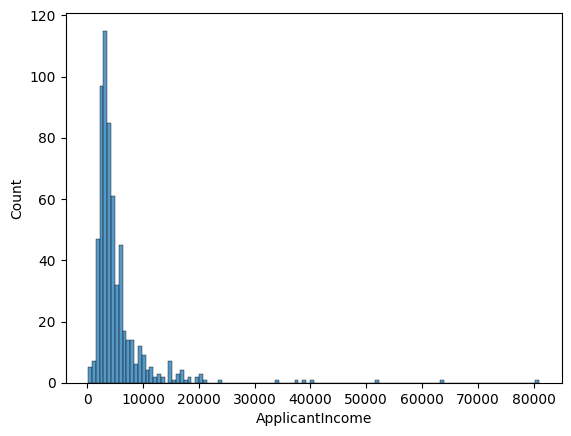

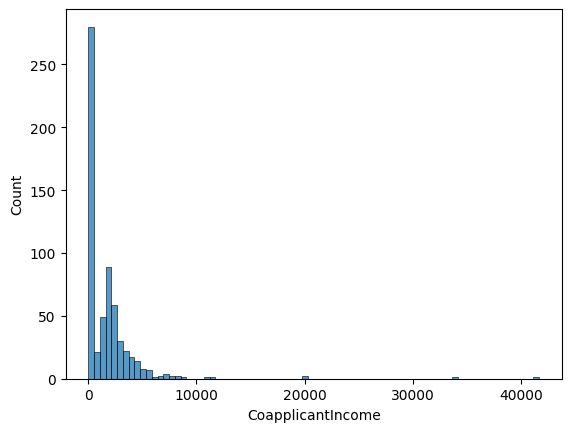

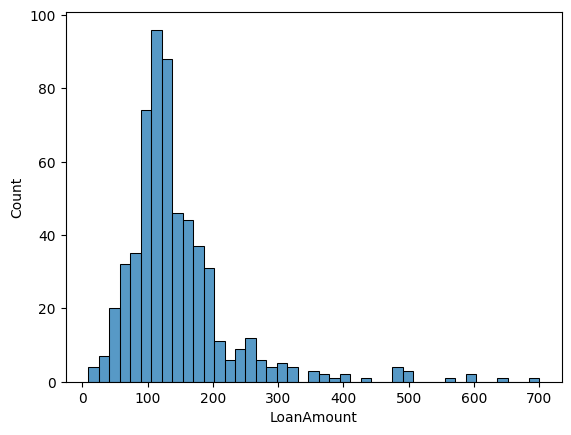

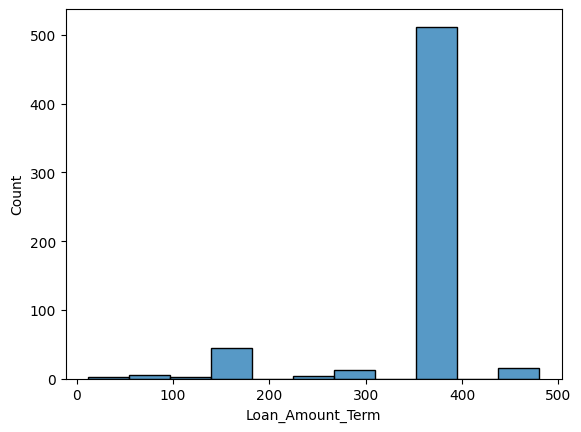

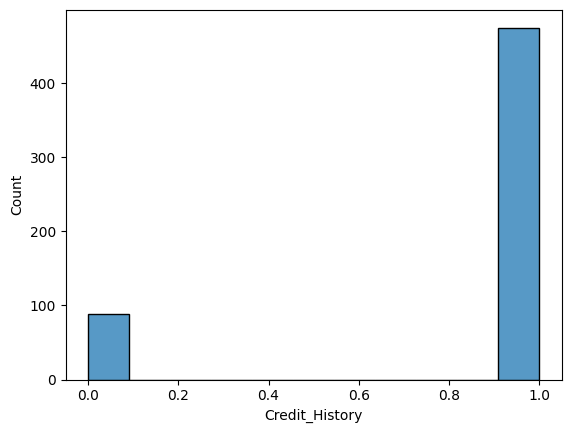

In [48]:
for col in df.select_dtypes('number').columns :
    plt.figure()
    sns.histplot(data = df , x = col)

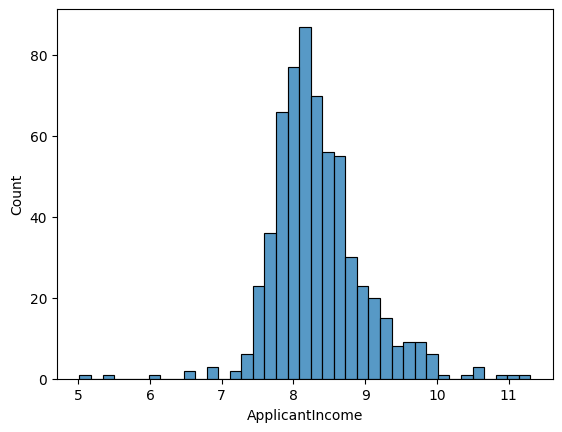

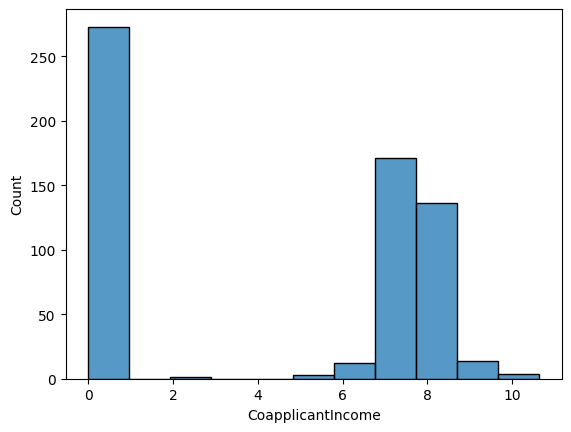

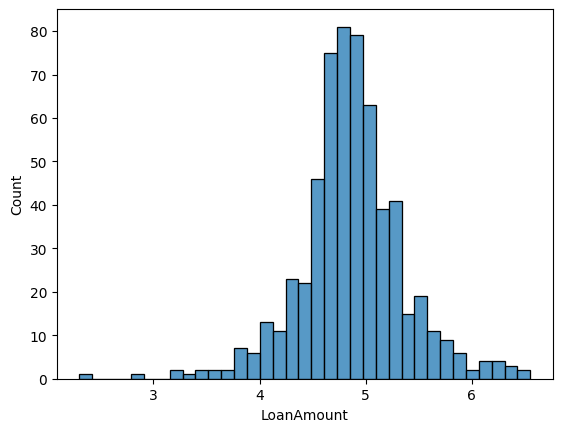

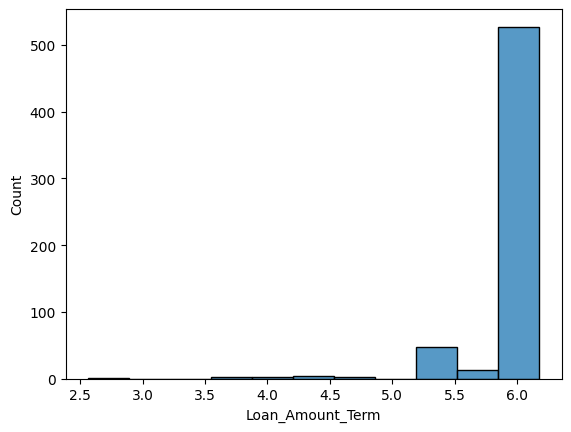

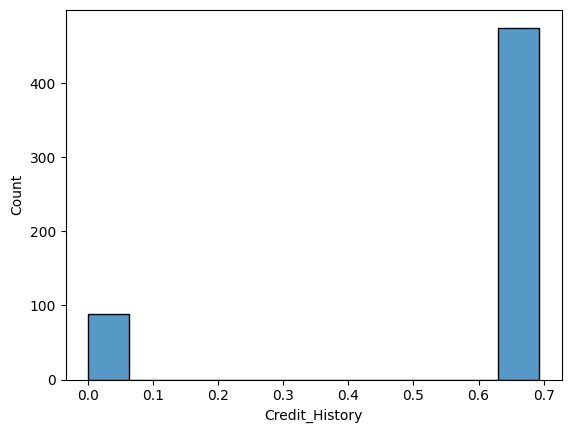

In [52]:
for col in df.select_dtypes('number').columns :
    plt.figure()
    sns.histplot(data = df , x = np.log1p(df[col]))

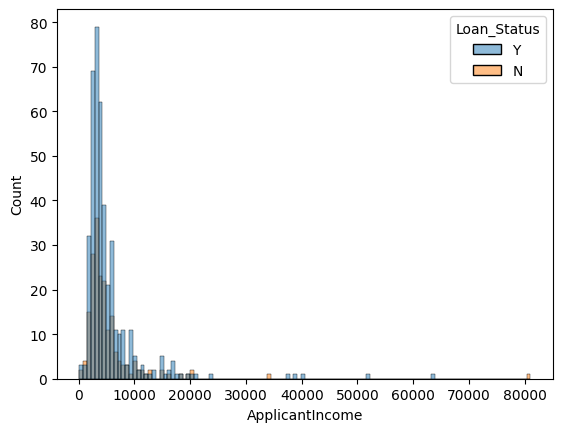

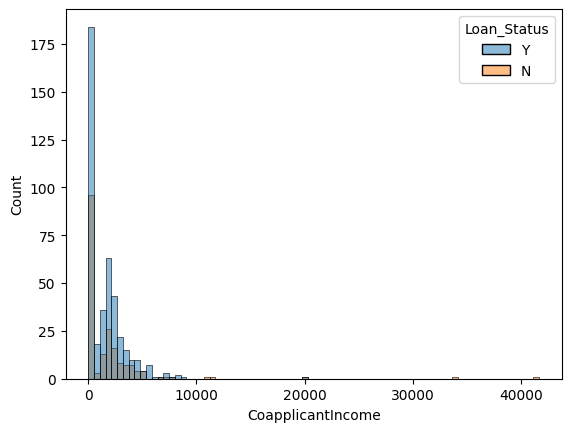

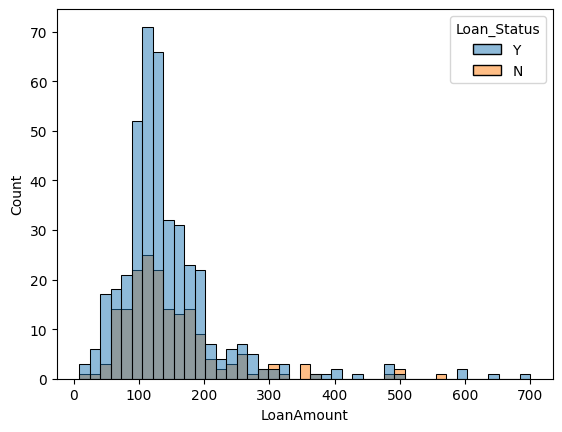

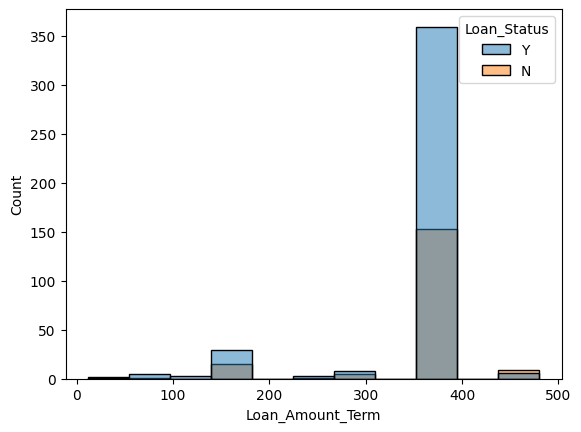

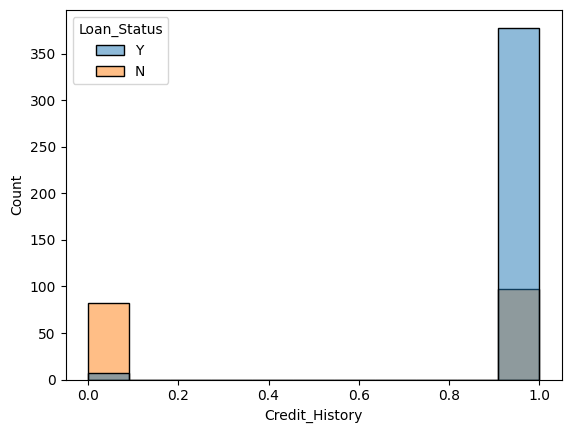

In [54]:
for col in df.select_dtypes('number').columns :
    plt.figure()
    sns.histplot(data = df , x = col , hue = 'Loan_Status')

In [53]:
df.columns 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

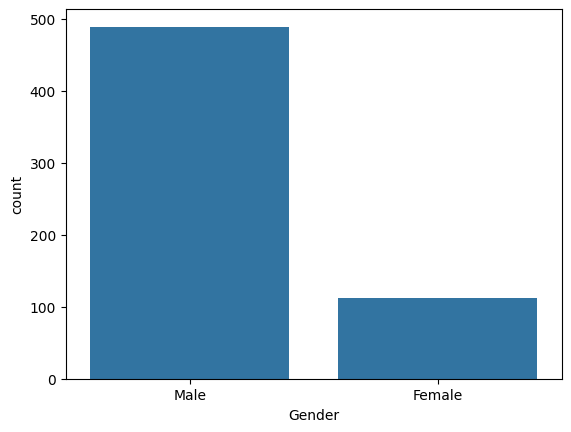

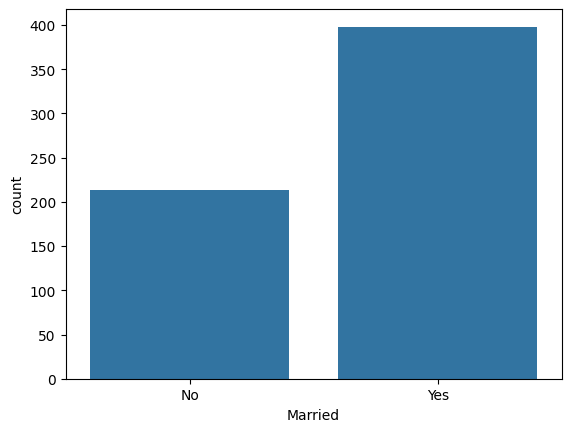

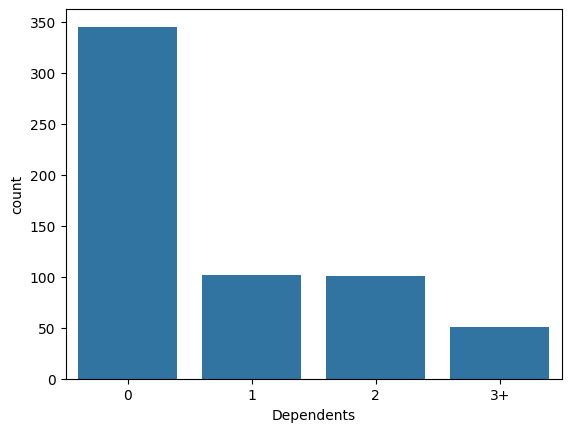

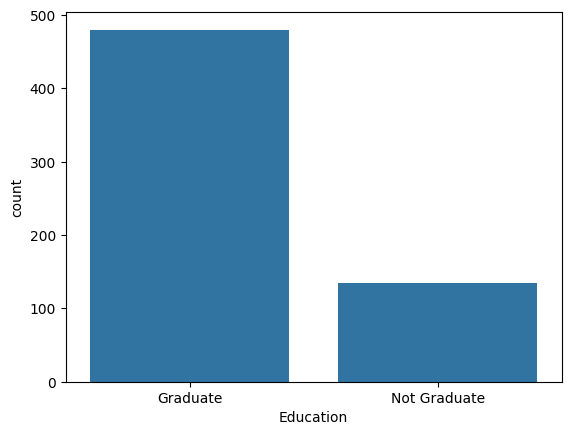

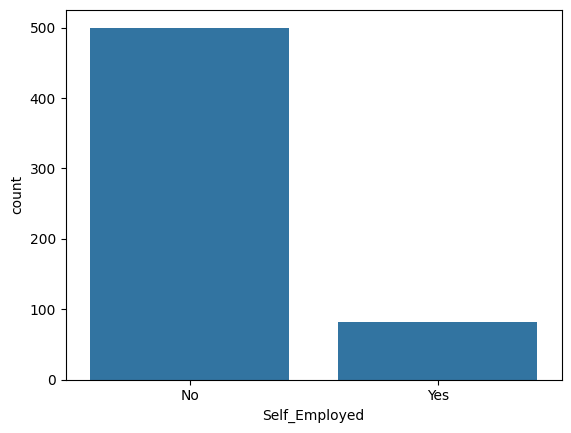

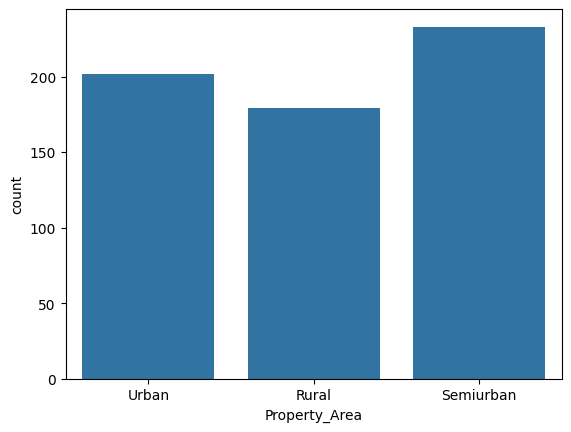

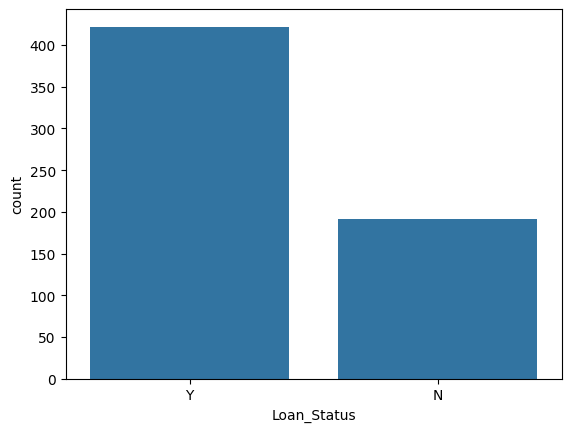

In [56]:
for col in df.select_dtypes('O').columns :
    plt.figure()
    sns.countplot(data = df , x = df[col])

In [57]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [58]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [65]:
df['Dependents'] = df['Dependents'].apply(lambda x : 3 if x == '3+' else float(x) )

In [64]:
print(type(np.nan))

<class 'float'>


In [66]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##### Data Preparation & Modeling 

In [68]:
for col in df.select_dtypes('O').columns :
    print(col , '--' , df[col].nunique())

Gender -- 2
Married -- 2
Education -- 2
Self_Employed -- 2
Property_Area -- 3
Loan_Status -- 2


In [69]:
df.select_dtypes('O').isnull().mean()*100

Gender           2.117264
Married          0.488599
Education        0.000000
Self_Employed    5.211726
Property_Area    0.000000
Loan_Status      0.000000
dtype: float64

In [71]:
from sklearn.preprocessing import LabelEncoder , StandardScaler , PolynomialFeatures , OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , RocCurveDisplay

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer , KNNImputer

# from sklearn.pipeline import make_pipeline

from imblearn.pipeline import make_pipeline  ,Pipeline
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

* category columns 
>* impute missing + ohe encoder (sub pipeline)
>* impute missing + be encoder  (sub pipeline)

* numeric columns 
>* imputing missing + log 
>* imputing missing 

In [72]:
df.select_dtypes('O').columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [74]:
ohe_pl = make_pipeline(SimpleImputer(strategy='most_frequent') , OneHotEncoder(sparse_output=False , drop = 'first'))

be_pl = make_pipeline(SimpleImputer(strategy='most_frequent') , BinaryEncoder())

cat_transformer = ColumnTransformer(transformers=[
    
    ('ohe_pl' , ohe_pl , ['Gender', 'Married', 'Education','Property_Area'] ),
    ('be_pl' ,be_pl , ['Self_Employed'])
    
] , remainder='passthrough')

cat_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_pl',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Gender', 'Married', 'Education',
                                  'Property_Area']),
                                ('be_pl',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binaryencoder',
                                                  BinaryEncoder())]),
                                 ['Self_Employed'])])

* numeric columns 
>* imputing missing + log 
>* imputing missing 

In [117]:
def fun(x):
    return np.where(x == '3+', 3.0, x.astype(float))

In [118]:
dep_pl = make_pipeline(FunctionTransformer(fun) , SimpleImputer(strategy='most_frequent'))

dep_pl.fit_transform(df[['Dependents']])

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [3.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [2.],
       [0.],
       [3.],
       [3.],
       [0.],
       [0.],

In [120]:
log_imp_pl = make_pipeline(KNNImputer() ,
                           FunctionTransformer(np.log1p))

mod_pl = make_pipeline(SimpleImputer(strategy='most_frequent'))

dep_pl = make_pipeline(FunctionTransformer(fun) , SimpleImputer(strategy='most_frequent'))

num_transformer = ColumnTransformer(transformers=[
    
    ('log_imp_pl' ,log_imp_pl ,['ApplicantIncome',	'CoapplicantIncome'	,'LoanAmount'] ),
    ('mod_pl' ,mod_pl ,['Loan_Amount_Term','Credit_History'] ),
    ('dep_pl' , dep_pl , ['Dependents'])

], remainder='passthrough')

num_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('log_imp_pl',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>))]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount']),
                                ('mod_pl',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Loan_Amount_Term', 'Credit_History']),
                                ('dep_pl',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<function fun at 0x000001D527FBC220>)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Dependents'])])

In [121]:
preprocessing = ColumnTransformer(transformers=[
    
    ('cat_preprocessing' , cat_transformer , ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'] ),
    ('num_preprocessing' , num_transformer , ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])
    
] , remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_preprocessing',
                                 ColumnTransformer(remainder='passthrough',
                                                   transformers=[('ohe_pl',
                                                                  Pipeline(steps=[('simpleimputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('onehotencoder',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 sparse_output=False))]),
                                                                  ['Gender',
                                                                   'Married',
                                                                   'Education',
                                                                   'Property_Area']),
                                                                 ('be_pl',
                                                                  Pipeli...
                                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                                  ['Loan_Amount_Term',
                                                                   'Credit_History']),
                                                                 ('dep_pl',
                                                                  Pipeline(steps=[('functiontransformer',
                                                                                   FunctionTransformer(func=<function fun at 0x000001D527FBC220>)),
                                                                                  ('simpleimputer',
                                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                                  ['Dependents'])]),
                                 ['Dependents', 'ApplicantIncome',
                                  'CoapplicantIncome', 'LoanAmount',
                                  'Loan_Amount_Term', 'Credit_History'])])

In [122]:
le = LabelEncoder()

x , y = df[df.columns[:-1]] , pd.Series(le.fit_transform(df['Loan_Status']))

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0 , stratify=y)

In [123]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

In [124]:
def Modeling(x_train , x_test ,y_train , y_test , model_name):
    
    # pipeline building
    pl = make_pipeline(preprocessing , StandardScaler() , SMOTE(), model_name)
    
    # display(pl)
    
    # pipeline fit 
    pl.fit(x_train , y_train)

    # pipeline predict
    y_train_prd = pl.predict(x_train)
    y_test_prd = pl.predict(x_test)

    # pipeline evaluation accuracy
    print(f'Train Acc : {accuracy_score(y_train , y_train_prd)}')
    print(f'Test Acc : {accuracy_score(y_test , y_test_prd)}')

    # pipeline evaluation recall
    print(f'Train recall : {recall_score(y_train , y_train_prd , average='macro')}')
    print(f'Test recall : {recall_score(y_test , y_test_prd , average='macro')}')

    # pipeline evaluation precision
    print(f'Train precision : {precision_score(y_train , y_train_prd,average='macro')}')
    print(f'Test precision : {precision_score(y_test , y_test_prd,average='macro')}')

    # pipeline evaluation f1 score
    print(f'Train f1_score : {f1_score(y_train , y_train_prd,average='macro')}')
    print(f'Test f1_score : {f1_score(y_test , y_test_prd,average='macro')}')

    # confusion matrix 
    train_con_mat = ConfusionMatrixDisplay(confusion_matrix(y_train , y_train_prd))
    plt.figure()
    train_con_mat.plot()
    plt.title(f'Train -- {model_name}')
    plt.show()

    test_con_mat = ConfusionMatrixDisplay(confusion_matrix(y_test , y_test_prd))
    plt.figure()
    test_con_mat.plot()
    plt.title(f'Test -- {model_name}')
    plt.show()
    



Train Acc : 0.7780040733197556
Test Acc : 0.8048780487804879
Train recall : 0.7113376238005318
Test recall : 0.7278637770897833
Train precision : 0.7477636215776633
Test precision : 0.7918318794607455
Train f1_score : 0.7234974710292059
Test f1_score : 0.7465659340659341


<Figure size 640x480 with 0 Axes>

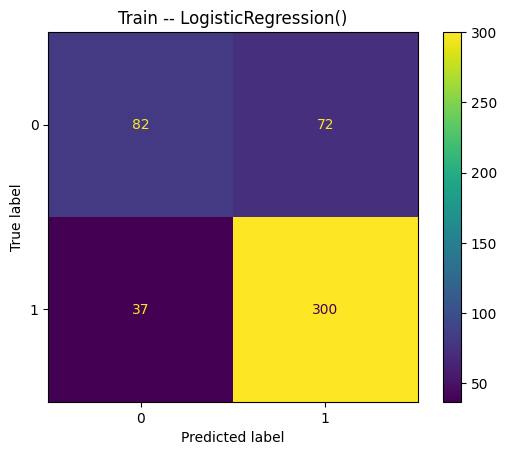

<Figure size 640x480 with 0 Axes>

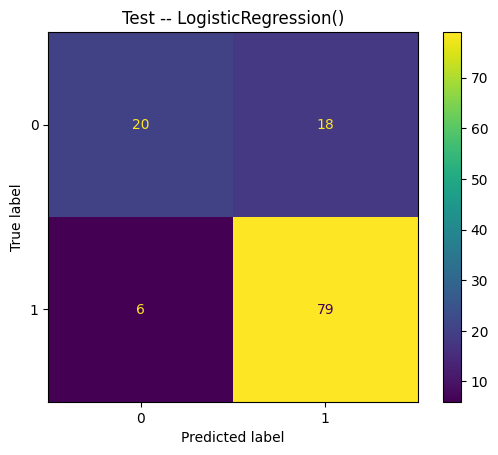

Train Acc : 0.8228105906313645
Test Acc : 0.7235772357723578
Train recall : 0.8092123010520637
Test recall : 0.6908668730650155
Train precision : 0.793265716374269
Test precision : 0.6812169312169312
Train f1_score : 0.7999438004917456
Test f1_score : 0.6850903614457831


<Figure size 640x480 with 0 Axes>

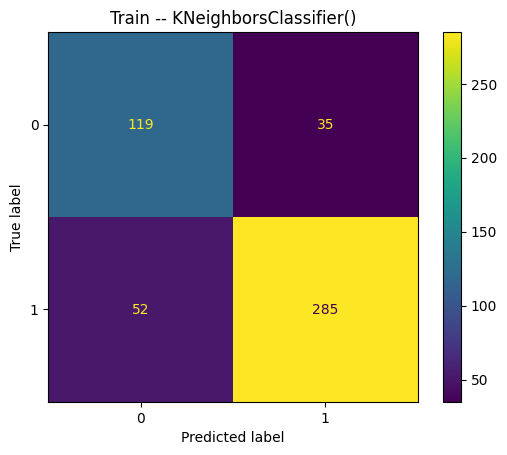

<Figure size 640x480 with 0 Axes>

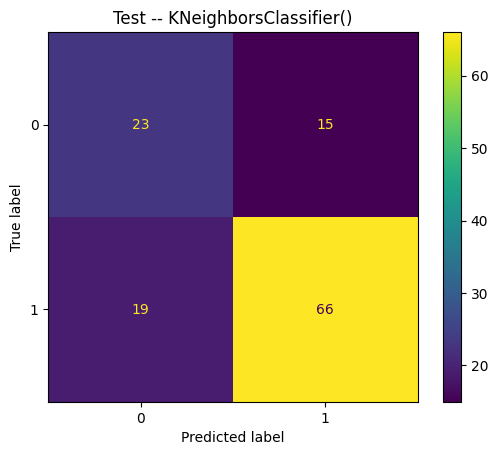

Train Acc : 0.8065173116089613
Test Acc : 0.7723577235772358
Train recall : 0.7074261050522178
Test recall : 0.6752321981424149
Train precision : 0.8376937072589246
Test precision : 0.7547254725472547
Train f1_score : 0.7311232930407365
Test f1_score : 0.6913978494623656


<Figure size 640x480 with 0 Axes>

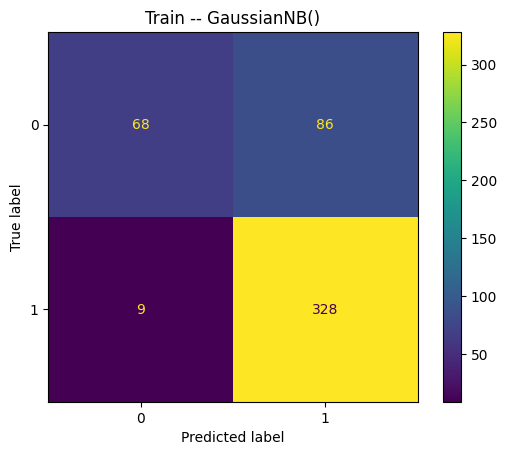

<Figure size 640x480 with 0 Axes>

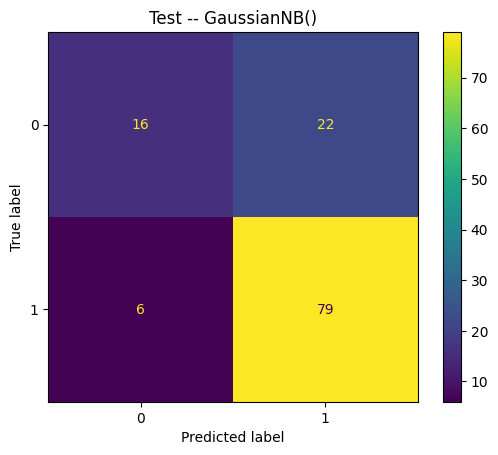

Train Acc : 0.845213849287169
Test Acc : 0.7642276422764228
Train recall : 0.8167174072218583
Test recall : 0.6911764705882353
Train precision : 0.8213489736070381
Test precision : 0.7265223771093177
Train f1_score : 0.818952802359882
Test f1_score : 0.70257650296006


<Figure size 640x480 with 0 Axes>

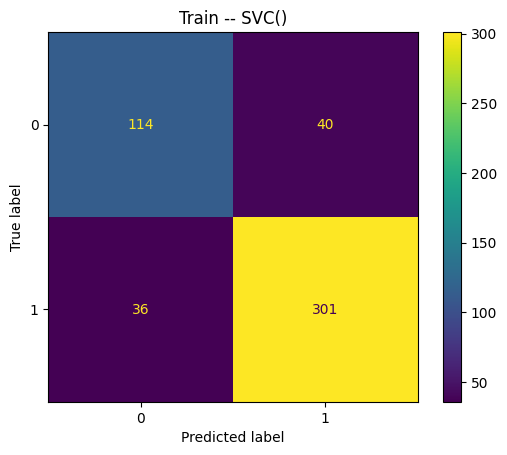

<Figure size 640x480 with 0 Axes>

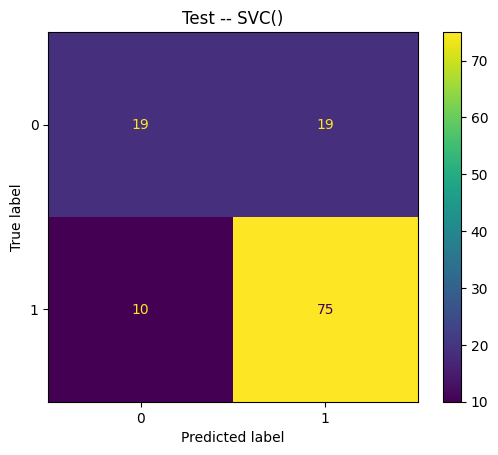

Train Acc : 1.0
Test Acc : 0.6341463414634146
Train recall : 1.0
Test recall : 0.6188854489164086
Train precision : 1.0
Test precision : 0.6045751633986929
Train f1_score : 1.0
Test f1_score : 0.603878909325127


<Figure size 640x480 with 0 Axes>

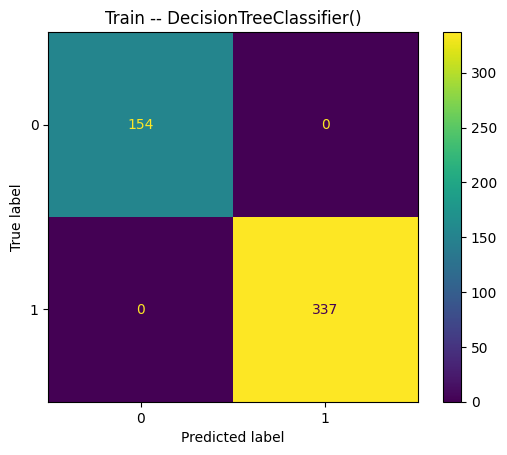

<Figure size 640x480 with 0 Axes>

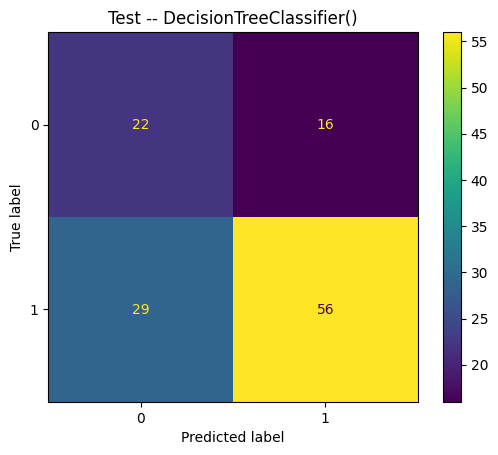

Train Acc : 1.0
Test Acc : 0.7560975609756098
Train recall : 1.0
Test recall : 0.6925696594427244
Train precision : 1.0
Test precision : 0.7135989010989011
Train f1_score : 1.0
Test f1_score : 0.700487012987013


<Figure size 640x480 with 0 Axes>

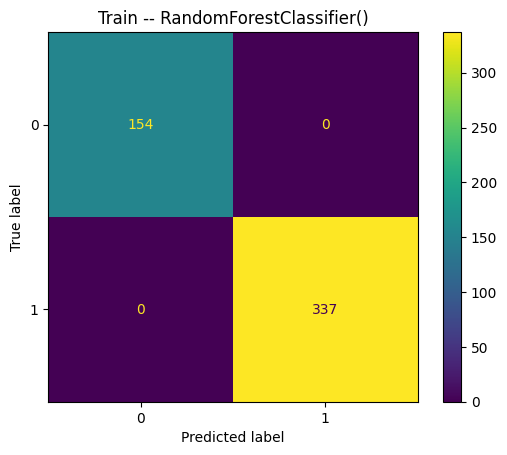

<Figure size 640x480 with 0 Axes>

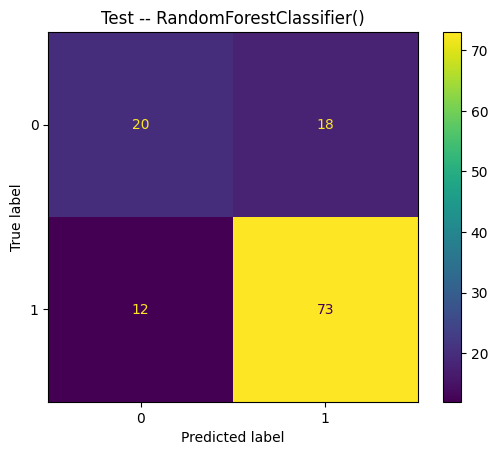

Train Acc : 0.8268839103869654
Test Acc : 0.8130081300813008
Train recall : 0.7786812593934256
Test recall : 0.7628482972136224
Train precision : 0.8066793893129771
Test precision : 0.7858585858585858
Train f1_score : 0.7899015832263585
Test f1_score : 0.7723138832997988


<Figure size 640x480 with 0 Axes>

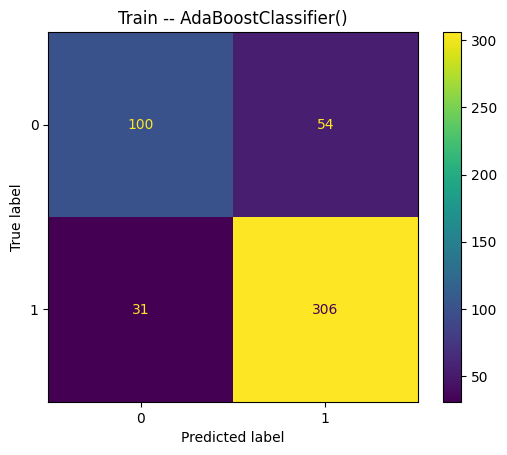

<Figure size 640x480 with 0 Axes>

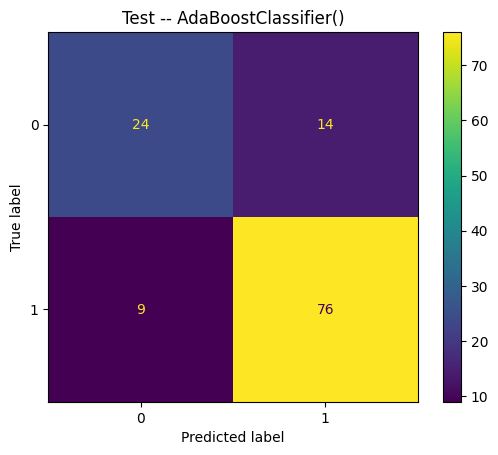

Train Acc : 0.9063136456211812
Test Acc : 0.7723577235772358
Train recall : 0.8629908667000654
Test recall : 0.6970588235294117
Train precision : 0.9184659469545515
Test precision : 0.7392857142857143
Train f1_score : 0.8840887629839471
Test f1_score : 0.7101010101010101


<Figure size 640x480 with 0 Axes>

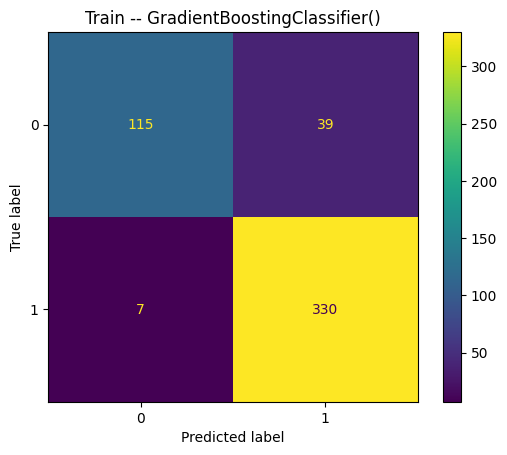

<Figure size 640x480 with 0 Axes>

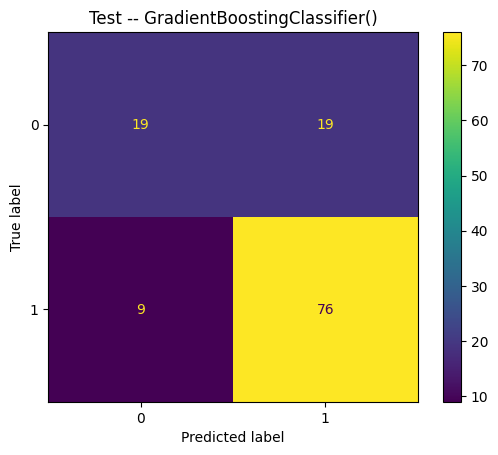

Train Acc : 1.0
Test Acc : 0.7317073170731707
Train recall : 1.0
Test recall : 0.6749226006191951
Train precision : 1.0
Test precision : 0.6834415584415584
Train f1_score : 1.0
Test f1_score : 0.6785968801963734


<Figure size 640x480 with 0 Axes>

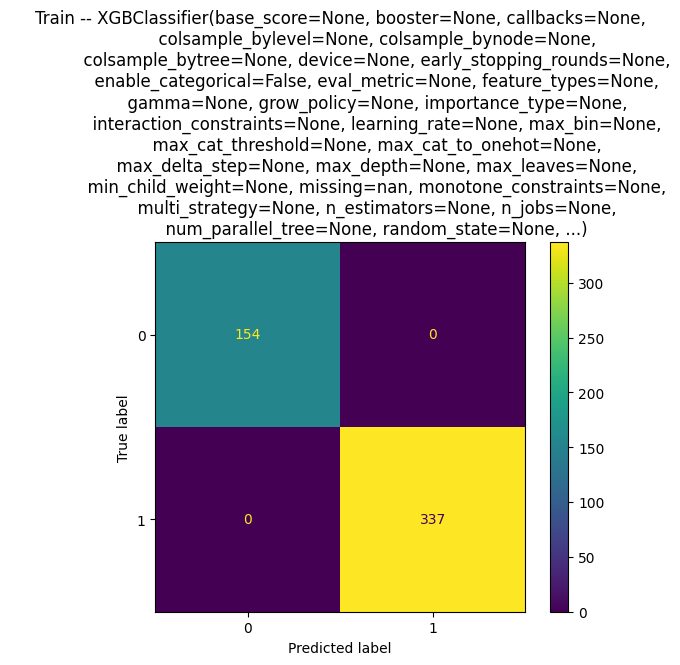

<Figure size 640x480 with 0 Axes>

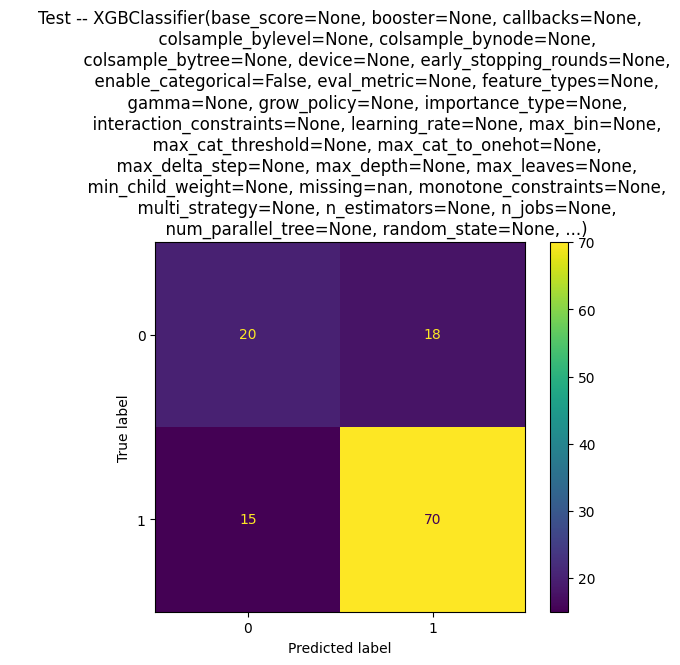

In [125]:
for model in models :
    Modeling(x_train , x_test ,y_train , y_test , model)
    

In [97]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
530,Male,Yes,0.0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural
522,Male,Yes,3.0,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural
454,Male,No,0.0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban
498,Male,Yes,1.0,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban
573,Male,Yes,2.0,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
309,Male,Yes,2.0,Not Graduate,No,7667,0.0,185.0,360.0,NaN,Rural
564,Male,Yes,2.0,Graduate,No,8799,0.0,258.0,360.0,0.0,Urban
73,Male,Yes,3.0,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban
235,Male,Yes,1.0,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural


In [126]:
pl = make_pipeline(preprocessing , StandardScaler() , SMOTE(), LogisticRegression())

In [128]:
import joblib

In [129]:
joblib.dump(pl , 'logistic_regression.h5')

['logistic_regression.h5']